# Randomized Digital Nets Demo

In [2]:

import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
seed = 5
genseed = 1234568

### Getting started

Here is an unshifted, unscrambled net

In [4]:
dnet = qp.DigitalNetB2(randomize=False,dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         137650502063357519521996832526300881892
    spawn_key       ()
[[0.    0.    0.    0.    0.   ]
 [0.5   0.5   0.5   0.5   0.5  ]
 [0.25  0.75  0.75  0.75  0.25 ]
 [0.75  0.25  0.25  0.25  0.75 ]
 [0.125 0.625 0.375 0.125 0.125]
 [0.625 0.125 0.875 0.625 0.625]
 [0.375 0.375 0.625 0.875 0.375]
 [0.875 0.875 0.125 0.375 0.875]]


Here is an unscrambled net with a digital shift

In [5]:
dnet = qp.DigitalNetB2(randomize='DS',dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)
print(dnet.m_max)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         290030846176622660364505172976801374000
    spawn_key       ()
[[0.83552023 0.17540328 0.17479413 0.42641675 0.20164172]
 [0.33552023 0.67540328 0.67479413 0.92641675 0.70164172]
 [0.58552023 0.92540328 0.92479413 0.67641675 0.45164172]
 [0.08552023 0.42540328 0.42479413 0.17641675 0.95164172]
 [0.96052023 0.55040328 0.29979413 0.30141675 0.07664172]
 [0.46052023 0.05040328 0.79979413 0.80141675 0.57664172]
 [0.71052023 0.30040328 0.54979413 0.55141675 0.32664172]
 [0.21052023 0.80040328 0.04979413 0.05141675 0.82664172]]
32


Here is a digital net with totally random generator matrices and no digital shift

In [6]:
dnet = qp.DigitalNetB2(generating_matrices=genseed,seed=seed,dimension = 5,randomize=False)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         5
    spawn_key       ()
[[0.         0.         0.         0.         0.        ]
 [0.09453348 0.55577451 0.13860372 0.16835733 0.83160105]
 [0.91848963 0.59564392 0.89131547 0.45476139 0.8092327 ]
 [0.94948545 0.0868399  0.77866796 0.37283762 0.10855208]
 [0.27679238 0.27161171 0.06517911 0.82757184 0.8994979 ]
 [0.37073547 0.79613335 0.20245525 0.97172214 0.19785601]
 [0.67959591 0.8670086  0.95512128 0.65503701 0.16181381]
 [0.71012353 0.32695744 0.84364864 0.54946841 0.99046988]]


Here is a digital net with totally random generator matrices and a digital shift

In [7]:
dnet = qp.DigitalNetB2(generating_matrices= genseed,seed=seed,dimension = 5,randomize='DS')
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         5
    spawn_key       ()
[[0.25507946 0.97528941 0.07574788 0.65819667 0.67124422]
 [0.34960531 0.46843983 0.18798435 0.51328879 0.49690862]
 [0.66575252 0.38208864 0.96596471 0.85969053 0.39452308]
 [0.69674071 0.93590847 0.82890308 0.96505516 0.68793825]
 [0.02965156 0.7349363  0.01482614 0.48297386 0.30303715]
 [0.12360228 0.19683767 0.12768829 0.31538937 0.59936677]
 [0.92463853 0.14198063 0.90586695 0.06175344 0.51065113]
 [0.95517378 0.66454951 0.76802718 0.14389644 0.33730734]]


In [8]:
dnetcomp = qp.DigitalNetB2(dimension=5,seed=seed)
dnetcomp.gen_samples(8)

array([[0.40903903, 0.52081583, 0.34458808, 0.0379708 , 0.63803439],
       [0.78181288, 0.35844894, 0.55126612, 0.99863014, 0.27763404],
       [0.24451157, 0.22277571, 0.93884728, 0.54375734, 0.78881561],
       [0.6173461 , 0.90455178, 0.14626132, 0.48898147, 0.17838952],
       [0.30872313, 0.41829054, 0.03693177, 0.23779469, 0.53426219],
       [0.93594844, 0.70902195, 0.86080111, 0.79294307, 0.42383329],
       [0.09825122, 0.84092602, 0.62931795, 0.74383204, 0.88471231],
       [0.72541561, 0.03835378, 0.45391566, 0.28304357, 0.02431869]])

### Comparison between randomized digital net and default digital net 

In [9]:
dnet2 = qp.DigitalNetB2(dimension = 2, generating_matrices= genseed, seed = seed)
dnetcomp2 = qp.DigitalNetB2(dimension = 2, seed = seed)

Randomized = dnet2.gen_samples(64)
Default = dnetcomp2.gen_samples(64)

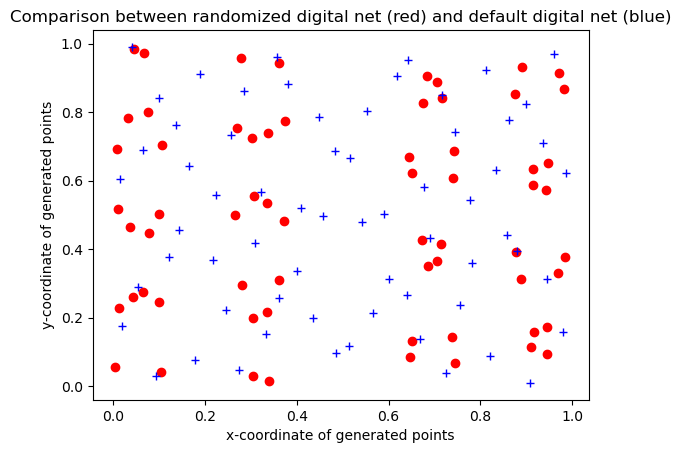

In [10]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro',Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.title("Comparison between randomized digital net (red) and default digital net (blue)")
plt.show()

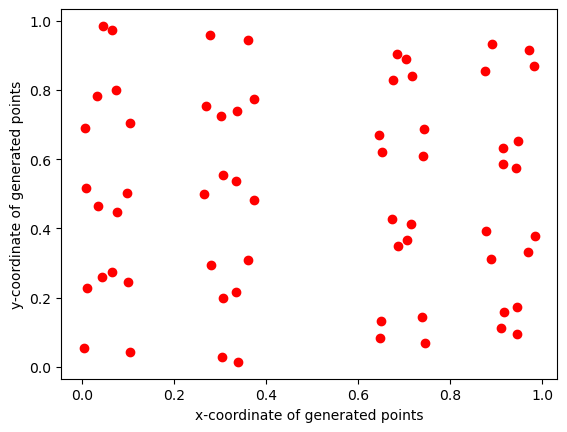

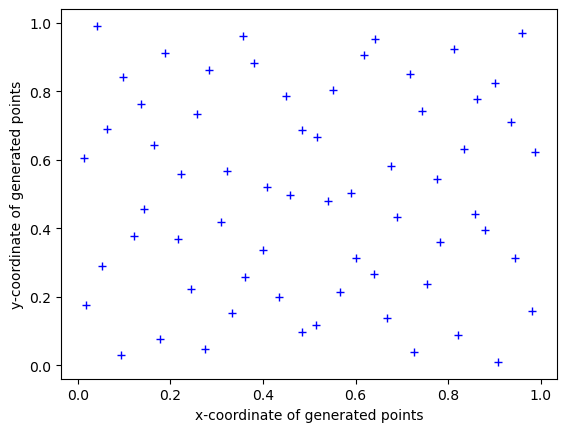

In [11]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()
plt.plot(Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()

## Integration

### Sample Integration  

In [12]:
d = 2
tol = 1e-3
dnet = qp.DigitalNetB2(dimension = d, generating_matrices= genseed)
print(dnet.m_max)
gaussian_net = qp.Gaussian(dnet,mean = 0, covariance=1/2)
dnetcomp = qp.DigitalNetB2(d)
gaussian_net_comp = qp.Gaussian(dnetcomp,mean = 0,covariance = 1/2)


20


In [14]:
solution_random,data_random = qp.CubQMCNetG(qp.Keister(gaussian_net),abs_tol = tol).integrate()
solution_default,data_default = qp.CubQMCNetG(qp.Keister(gaussian_net_comp),abs_tol= tol).integrate()
print("Integration data from a randomized digital net")
print(data_random)
print("\nIntegration data from the default digital net")
print(data_default)


Integration data from a randomized digital net
LDTransformData (AccumulateData Object)
    solution        1.808
    comb_bound_low  1.808
    comb_bound_high 1.809
    comb_flags      1
    n_total         2^(13)
    n               2^(13)
    time_integrate  0.052
CubQMCNetG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    graycode        0
    entropy         332938467638998731165929616484659784444
    spawn_key       ()

Integration data from the default digital net
LDTransformDat

In [17]:
answer = qp.Keister(dnet).exact_integ(2)
print(f"Difference between randomized digital net results and exact answer {0}".format(abs(answer-solution_random)))
print(f"Difference between default digital net results and exact answer {0}".format(abs(answer-solution_default)))

Difference between randomized digital net results and exact answer 0
Difference between default digital net results and exact answer 0


### Error comparison between mean of means and median of means

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


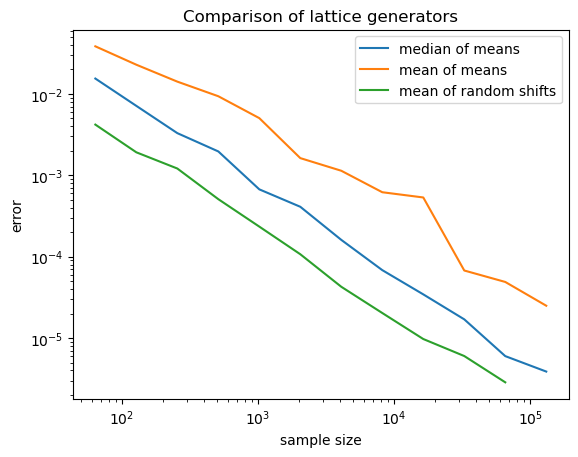

In [18]:
#mean of means vs. median of means

d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = genseed,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")

